# Final Project
## Jacob Crump
### BMI 6950

In [1]:
import os
import re
from ipywidgets import *
from IPython.display import display
from inouts import * #imports functions from the inout package
from analysiss import *
from meta_list_cl import Meta_list_data

Below is a dropdown menu that allows you to choose one of two files that are compatible with this program

In [2]:
choose = Dropdown(description = 'Choose file you would like to discover:',options = ['Post-Operative data', 'Pima Indian Diabetes data'])
display(choose)

The installed widget Javascript is the wrong version.


### The sections below are split up so that the neccessary widgets will work effectively. Run each of them to get the necessary information from the data file chosen above.

This cell will run if 'Post-Operative data' was chosen. It will give a button option that if clicked, the next cell will export statistical data into a text file and bar charts for each data point in a pdf file

In [10]:
#This cell will be run if 'Post-Operative data' was chosen
if choose.value == 'Post-Operative data':
    file_data = os.path.join(os.getcwd(), "data/post_operative.data")   #Get the file paths of the two files
    file_names = os.path.join(os.getcwd(), "data/post_operative.names")  #The first contains the data and the other contains the meta-data
    start = "Attribute Information"   #This tells the inputs function where to look for the meta data needed from file
    end = "Missing Attribute" #This tells the inputs function where to stop looking for the meta data needed from file
    pattern = re.compile(r'\d\.\s*(.+)\s\((.+)\)')   #This is the regex to capture each meta data point
    meta_objects, all_info = inps.inputs(file_names, file_data, start, end, pattern)  #returns a list of meta data objects and lists of the data
    choose2 = Checkbox(description = 'Export Data', x=False)
    display(choose2)
    

In [11]:
if choose.value == 'Post-Operative data':
    if choose2.value == True:
        name = input("Type name of Files (don't include the suffix):")
        outs.out_bar_charts(all_info, meta_objects, name+'.pdf')
        outs.out_stats(all_info, meta_objects, name+'.txt')

This cell will run if 'Pima Indian Diabetes data' was chosen. This data set can be looked at by histograms. A slider will appear and based on your choice, a histogram for that data will appear.

In [13]:
if choose.value == 'Pima Indian Diabetes data':
    file_data = os.path.join(os.getcwd(), "data/pima_indians_diabetes.data") #Get the file paths of the two files
    file_names = os.path.join(os.getcwd(), "data/pima_indians_diabetes.names") #The first contains the data and the other contains the meta-data
    start = "For Each Attribute" #This tells the inputs function where to look for the meta data needed from file
    end = "Missing Attribute" #This tells the inputs function where to stop looking for the meta data needed from file
    pattern = re.compile(r'\d\.\s*(.+)\s\((.*)\)') #This is the regex to capture each meta data point
    meta_objects, all_info = inps.inputs(file_names, file_data, start, end, pattern) #returns a list of meta data objects and lists of the data
    for x in range(len(meta_objects)):  #Prints out the options for the possible histograms
        print(str(x+1)+'. ', meta_objects[x].abrev)
    choose3 = IntSlider(description = 'Choose histogram #', min = 1,max = len(meta_objects))
    display(choose3)

1.  Number of times pregnant
2.  Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3.  Diastolic blood pressure
4.  Triceps skin fold thickness
5.  2-Hour serum insulin
6.  Body mass index
7.  Diabetes pedigree function
8.  Age
9.  Class variable


The installed widget Javascript is the wrong version.


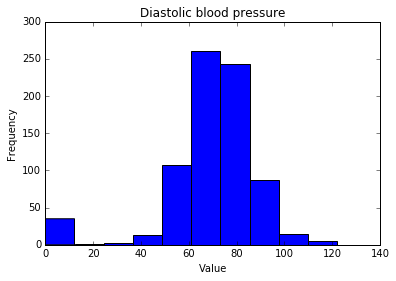

In [16]:
if choose.value == 'Pima Indian Diabetes data':
    histo(all_info[int(choose3.value-1)], meta_objects[int(choose3.value-1)].get_abrev()) #prints the histogram
#the sixth option doesn't work since it is a list of floats

Here I demonstrate the ``__str__`` function of the Meta_data class

In [17]:
print(meta_objects[2])

Name: Diastolic blood pressure
Definition/Units: mm Hg


Here I demonstrate class heirarchy where Meta_list_data is a child of Meta_data. It includes a list of the relevant information in the object

In [18]:
test = Meta_list_data(meta_objects[2].abrev, meta_objects[2].defin, meta_objects[2].interp, all_info[2])
print(test)

Meta_list_data_list = []  #This list will be used for the database implementation
for x in range(len(meta_objects)): 
    Meta_list_data_list.append(Meta_list_data(meta_objects[x].abrev, meta_objects[x].defin, meta_objects[x].interp, all_info[x]))

Name: Diastolic blood pressure
Definition/Units: mm Hg
['72', '66', '64', '66', '40', '74', '50', '0', '70', '96', '92', '74', '80', '60', '72', '0', '84', '74', '30', '70', '88', '84', '90', '80', '94', '70', '76', '66', '82', '92', '75', '76', '58', '92', '78', '60', '76', '76', '68', '72', '64', '84', '92', '110', '64', '66', '56', '70', '66', '0', '80', '50', '66', '90', '66', '50', '68', '88', '82', '64', '0', '72', '62', '58', '66', '74', '88', '92', '66', '85', '66', '64', '90', '86', '75', '48', '78', '72', '0', '66', '44', '0', '78', '65', '108', '74', '72', '68', '70', '68', '55', '80', '78', '72', '82', '72', '62', '48', '50', '90', '72', '60', '96', '72', '65', '56', '122', '58', '58', '85', '72', '62', '76', '62', '54', '92', '74', '48', '60', '76', '76', '64', '74', '80', '76', '30', '70', '58', '88', '84', '70', '56', '64', '74', '68', '60', '70', '60', '80', '72', '78', '82', '52', '66', '62', '75', '80', '64', '78', '70', '74', '65', '86', '82', '78', '88', '52', '56',

#### Database
Here I take the information extracted from the files and store them into a local database


In [19]:
import sqlite3 as sq
db = sq.connect(":memory:")
curs = db.cursor()

curs.execute("""CREATE TABLE IF NOT EXISTS data(Info_Type text, Data_Name text, 
                Definition text, Abbreviation text, Data_List text)""")
for x in range(len(Meta_list_data_list)):
    info = ", ".join(all_info[x])  #Used to insert the list as a string
    curs.execute("""INSERT INTO data(Info_Type, Data_Name, Definition, Abbreviation, Data_list) 
                    VALUES(?,?,?,?,?)""", (choose.value,Meta_list_data_list[x].abrev, Meta_list_data_list[x].defin, 
                    Meta_list_data_list[x].interp, info))

And to demonstrate that it worked:

In [20]:
curs.execute("""SELECT * FROM data """ )
print(curs.fetchall()[0])

('Pima Indian Diabetes data', 'Number of times pregnant', '', '', '6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, 5, 7, 0, 7, 1, 1, 3, 8, 7, 9, 11, 10, 7, 1, 13, 5, 5, 3, 3, 6, 10, 4, 11, 9, 2, 4, 3, 7, 7, 9, 7, 0, 1, 2, 7, 7, 1, 1, 5, 8, 7, 1, 7, 0, 0, 0, 2, 8, 5, 2, 7, 5, 0, 2, 1, 4, 2, 5, 13, 4, 1, 1, 7, 5, 0, 2, 3, 2, 7, 0, 5, 2, 13, 2, 15, 1, 1, 4, 7, 4, 2, 6, 2, 1, 6, 1, 1, 1, 0, 1, 2, 1, 1, 4, 3, 0, 3, 8, 1, 4, 7, 4, 5, 5, 4, 4, 0, 6, 2, 5, 0, 1, 3, 1, 1, 0, 4, 9, 3, 8, 2, 2, 0, 0, 0, 5, 3, 5, 2, 10, 4, 0, 9, 2, 5, 2, 1, 4, 9, 1, 8, 7, 2, 1, 2, 17, 4, 7, 0, 2, 0, 6, 3, 4, 4, 3, 6, 6, 2, 1, 2, 8, 6, 0, 5, 5, 6, 0, 1, 5, 4, 7, 8, 1, 8, 5, 3, 9, 7, 11, 8, 5, 1, 3, 4, 4, 0, 1, 0, 2, 6, 5, 8, 5, 1, 7, 2, 0, 7, 0, 9, 12, 5, 6, 5, 5, 0, 2, 7, 7, 1, 1, 0, 3, 4, 0, 4, 6, 1, 4, 3, 4, 7, 0, 9, 0, 1, 4, 3, 6, 2, 9, 10, 0, 9, 1, 9, 2, 2, 0, 12, 1, 3, 2, 1, 11, 3, 3, 4, 3, 4, 5, 0, 2, 0, 2, 10, 2, 3, 1, 13, 2, 7, 0, 5, 2, 0, 10, 7, 7, 2, 7, 5, 1, 4, 5, 0, 0, 2, 1, 0, 6, 2, 0, 14, 8, 0, 2, 5, 5,